In [1]:
import astropy.coordinates as coord
import astropy.units as u
from astropy.io import ascii
from astropy.table import Table
from astropy.coordinates import SkyCoord 
import numpy as np
from pathlib import Path
from astropy.table import Column
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ROOT_PATH = Path("..") # necessary since we are in the `notebooks/` sub-folder

In [3]:
table = Table.read(ROOT_PATH / "input_luis_images.txt", format="ascii")
table.colnames
table

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Put data in form expected by scikit-learn (and without col1 and col2 and -0)

In [4]:
table.remove_columns(['col1', 'col2'])


In [5]:
table
table.colnames

['col3',
 'col4',
 'col5',
 'col6',
 'col7',
 'col8',
 'col9',
 'col10',
 'col11',
 'col12',
 'col13',
 'col14',
 'col15',
 'col16',
 'col17',
 'col18',
 'col19',
 'col20',
 'col21']

In [6]:
X = np.array(list(zip(table['col3'],
 table['col4'],
 table['col5'],
 table['col6'],
 table['col7'],
 table['col8'],
 table['col9'],
 table['col10'],
 table['col11'],
 table['col12'],
 table['col13'],
 table['col14'],
 table['col15'],
 table['col16'],
 table['col17'],
 table['col18'],
 table['col19'],
 table['col20'],
 table['col21'])))

In [7]:
X.shape

(77500, 19)

In [8]:
# Standarized the data
X_stand = StandardScaler().fit_transform(X)

In [9]:
# Creating the PCA 
pca = PCA(n_components=10)
pca.fit(X_stand)

X_pca = pca.transform(X_stand)

In [10]:
#porcentages
print("Porcentage:", pca.explained_variance_ratio_)
print("Singular Value:", pca.singular_values_)
print("Component:", pca.components_) # eigevectors
print("Sorted components:", pca.explained_variance_) # eigenvalues

Porcentage: [7.36594822e-01 2.19279379e-01 2.37339675e-02 9.04929204e-03
 5.96865166e-03 2.76205143e-03 1.16128582e-03 7.50986730e-04
 3.26468714e-04 1.30687360e-04]
Singular Value: [1041.45853276  568.23312575  186.94455632  115.43432126   93.74881106
   63.77398165   41.35206601   33.25399163   21.92544596   13.87217136]
Component: [[ 2.49799564e-01  2.51529911e-01  2.51529911e-01  1.22357121e-01
   1.90057476e-01  2.51652774e-01  2.55198199e-01  2.30849440e-01
   2.51576599e-01  1.27568577e-01  2.61393556e-01  2.01882925e-01
   2.49777286e-01  2.01882925e-01  2.51171607e-01  2.09082339e-01
   2.12503327e-01  2.59188570e-01  2.59410009e-01]
 [-1.68070049e-01 -1.61009659e-01 -1.61009659e-01  3.95898658e-01
  -2.21612991e-01 -9.99718515e-02 -1.11435044e-01  2.36365202e-01
  -1.55222103e-01  4.09001625e-01 -7.06120669e-02  3.14186849e-01
  -1.68412037e-01  3.14186848e-01 -1.56748930e-01  2.96659610e-01
   2.88762420e-01 -1.10562007e-01 -7.37497111e-02]
 [ 8.84489599e-02  5.95977587e-02 

[(-5.0, 20.0), (-5.0, 10.0), (-5.0, 6.0)]

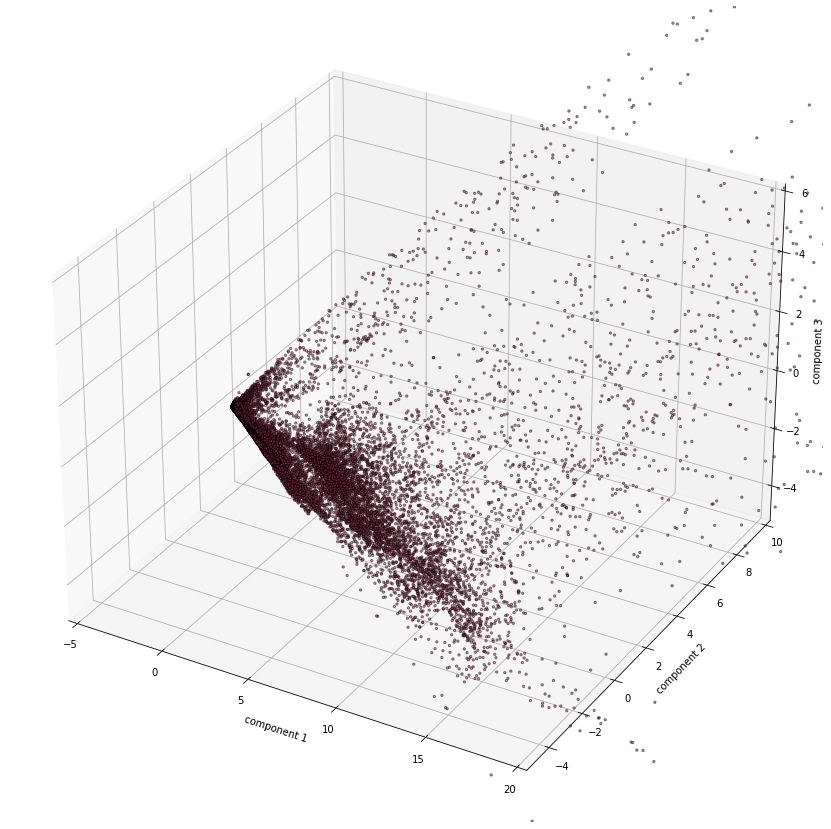

In [11]:
import seaborn as sns
from matplotlib import animation

fig, ax = plt.subplots(figsize=(15, 15)), plt.axes(projection='3d')

ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
            c=sns.xkcd_rgb['dark pink'], s=5, edgecolor='black', alpha=0.5,
            cmap=plt.cm.get_cmap('Accent', 10))
ax.set_xlabel('component 1')
ax.set_ylabel('component 2')
ax.set_zlabel('component 3')
ax.set(xlim=[-5.0, 20.0], ylim=[-5.0, 10.0], zlim=[-5.0, 6.0])

#ax.set_aspect("equal")
#plt.savefig("PC1_PC2_input_luis.pdf")

In [12]:
# Make the images 2D
from astropy.nddata import Cutout2D
from astropy import units as u
from astropy.modeling.models import Gaussian2D

In [13]:
pc1 = X_pca[:, 0].reshape((250, 310))
pc2 = X_pca[:, 1].reshape((250, 310))
pc3 = X_pca[:, 2].reshape((250, 310))
pc4 = X_pca[:, 3].reshape((250, 310))
pc5 = X_pca[:, 4].reshape((250, 310))
pc6 = X_pca[:, 5].reshape((250, 310))
pc7 = X_pca[:, 6].reshape((250, 310))
pc8 = X_pca[:, 7].reshape((250, 310))
pc9 = X_pca[:, 8].reshape((250, 310))
pc10 = X_pca[:, 9].reshape((250, 310))

In [14]:
from astropy.io import fits

def FitsFile(pc, label, number):
    hdu = fits.PrimaryHDU(pc)
    hdu.header
    hdu.header['PCA dimension'] = label
    hdul = fits.HDUList([hdu])
    hdul.writeto(ROOT_PATH / 'PC{}_2D_luis_images.fits'.format(number), overwrite=True)

In [15]:
FitsFile(pc1, "PC1", 1)
FitsFile(pc2, "PC2", 2)
FitsFile(pc3, "PC3", 3)
FitsFile(pc4, "PC4", 4)
FitsFile(pc5, "PC5", 5)
FitsFile(pc6, "PC6", 6)
FitsFile(pc7, "PC7", 7)
FitsFile(pc8, "PC8", 8)
FitsFile(pc9, "PC9", 9)
FitsFile(pc10, "PC10", 10)

In [16]:
data = Table(X_pca, names=('PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'), meta={'name': 'first table'})


In [17]:
x, y = [], []
for i in range(len(pc1[:,0])):
    for j in range(len(pc1[0])):
        x.append(i)
        y.append(j)       
data['x'] = x
data['y'] = y

In [18]:
#reorganizing the colunm names
new_order = ['x', 'y', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']
data_new = data[new_order]

In [19]:
data_new

x,y,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0,0,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,1,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,2,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,3,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,4,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,5,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,6,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,7,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895
0,8,-1.400324506791126,0.12150719317928044,0.035611647153874305,-0.052399559440937764,8.163397086614659e-05,0.0035175407054731066,0.020459974140834437,0.022533816659181423,0.0014643733414786131,-0.0047441201463523895


In [20]:
# Save the table result 
asciifile = "PCs_output_luis_images.dat" 
data_new.write(ROOT_PATH / asciifile, format="ascii")